In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter

In [3]:
df_original = pd.read_csv("main.csv").drop(columns=["Tours"])
df_original.head(20)

,Node,Solver,Iteration,Cost,Time[s]
0,5,milp,1,69.0,11.102570
1,5,milp,2,61.0,0.067850
2,5,milp,3,65.0,0.076969
3,5,milp,4,57.0,0.166535
4,5,milp,5,51.0,0.064387
5,5,ortools,1,99.0,0.258334
6,5,ortools,2,93.0,0.046917
7,5,ortools,3,91.0,0.039472
8,5,ortools,4,111.0,0.037623
9,5,ortools,5,105.0,0.040929


In [4]:
# Replace the time of the rows whose costs are infinite
### Inplace
df = copy.deepcopy(df_original)
# df.loc[df["Cost"] == float("inf"), "Time[s]"] = 180
### Edit the copied df.
# df[df["Cost"] == float("inf")]["Time[s]"] = 180

In [5]:
# df.groupby(["Node", "ConstraintRatio", "MaxTimeGap", "Agent", "Solver"])[
#     ["Time[s]", "Cost"]
# ].median().reset_index()

['milp' 'ortools']
[40]
[0.2 0.8]
[10 40]
[1 4]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


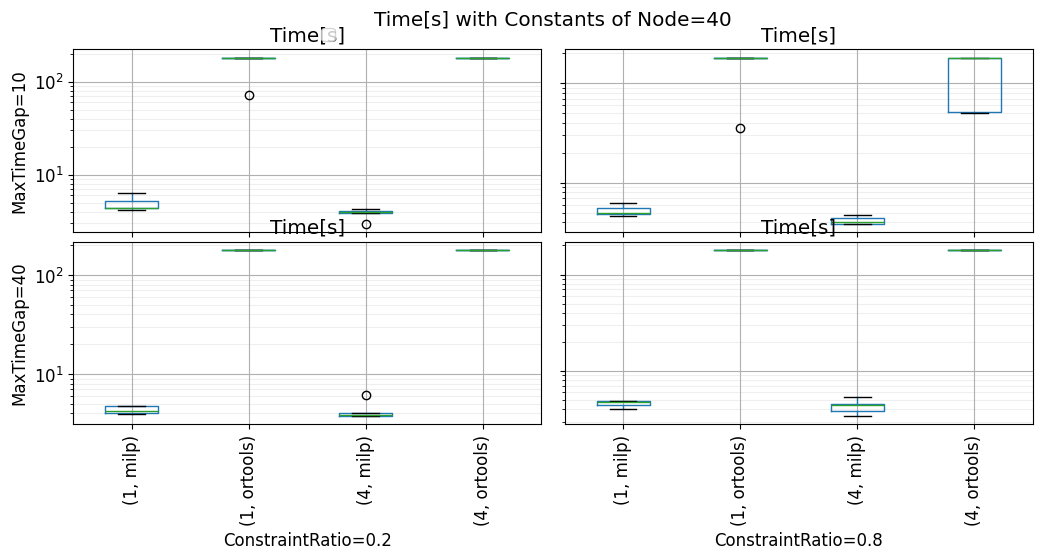

In [10]:
plt.rcParams.update({"font.size": 12})


Solvers = df["Solver"].unique()
print(Solvers)

Nodes = df["Node"].unique()
print(Nodes)

ConstraintRatio = df["ConstraintRatio"].unique()
print(ConstraintRatio)

MaxTimeGap = df["MaxTimeGap"].unique()
print(MaxTimeGap)

Agents = df["Agent"].unique()
print(Agents)

xLabel = "MaxTimeGap"
yLabel = "ConstraintRatio"
xElems = MaxTimeGap
yElems = ConstraintRatio

evalColumn = "Time[s]"

fig, axes = plt.subplots(nrows=len(xElems), ncols=len(yElems), figsize=(12, 5))

for irow, xelem in enumerate(xElems):
    for icol, yelem in enumerate(yElems):
        df.loc[(df[xLabel] == xelem) & (df[yLabel] == yelem)].boxplot(
            column=[evalColumn],
            by=["Agent", "Solver"],
            grid=True,
            rot=90,
            ax=axes[irow, icol],
        )
        axes[irow, icol].set_yscale("log")
        # ].set_index(["Nodes", "Agent", "Solver"]).unstack().plot(
        #     kind="bar",
        #     y="Time[s]",
        #     grid=True,
        #     # rot=0,
        #     ax=axes[irow, icol],
        #     ylim=(0, 20),
        #     legend=False,
        #     logy=True,
        #     width=0.75,
        # )

        axes[irow, icol].grid("on", which="minor", axis="x", alpha=0.2)
        axes[irow, icol].grid("on", which="minor", axis="y", alpha=0.2)

        if icol == 0:
            axis = axes[irow, icol].get_yaxis()
            axis.set_label_text(f"{xLabel}={xelem}")
        else:
            axis = axes[irow, icol].get_yaxis()
            # axis.set_ticks_position('none')
            # axis.set_label_text()
            axis.set_major_formatter(NullFormatter())
            # axis.set_visible(False)
            axes[irow, icol].set(xlabel=None)

        if irow == len(xElems) - 1:
            axis = axes[irow, icol].get_xaxis()
            axis.set_label_text(f"{yLabel}={yelem}")
        else:
            axis = axes[irow, icol].get_xaxis()
            # axis.set_label_text()
            # axis.set_ticks_position('none')
            axis.set_major_formatter(NullFormatter())
            # axis.set_visible(False)
            axes[irow, icol].set(xlabel=None)


consts = {c: df[c].iloc[0] for c in df.columns if len(df[c].unique()) == 1}
const_strs = [f"{k}={v}" for k, v in consts.items()]
const_str = " ".join(const_strs)
fig.suptitle(f"{evalColumn} with Constants of {const_str}")

plt.subplots_adjust(wspace=0.05, hspace=0.05)
# fig.tight_layout()
plt.legend(
    bbox_to_anchor=(0.3, 0.9),
    loc="lower left",
    bbox_transform=fig.transFigure,
    ncol=len(Agents),
)
plt.savefig("benchmark.png", dpi=300)

# OR-Tools Solver Comparison

In [2]:
df_original = pd.read_csv("benchmark_ortoolsolvers.csv")
df_original.head()

,Node,ConstraintRatio,MaxTimeGap,Agent,Solver,Iteration,Tours,Cost,Time[s]
0,20,0.6,20,1,PATH_CHEAPEST_ARC,1,"[[0, 8, 16, 1, 19, 12, 13, 6, 10, 17, 11, 14, ...",2420.0,5.464017
1,20,0.6,20,1,PATH_CHEAPEST_ARC,2,"[[0, 8, 9, 5, 10, 18, 2, 16, 12, 1, 13, 4, 14,...",2000.0,15.701668
2,20,0.6,20,1,PATH_CHEAPEST_ARC,3,"[[0, 8, 14, 2, 5, 9, 15, 12, 3, 19, 10, 1, 7, ...",2160.0,7.118984
3,20,0.6,20,1,PATH_CHEAPEST_ARC,4,"[[0, 5, 16, 9, 6, 15, 17, 12, 10, 4, 7, 2, 19,...",2320.0,117.792581
4,20,0.6,20,1,PATH_CHEAPEST_ARC,5,"[[0, 17, 3, 4, 15, 19, 6, 5, 2, 1, 12, 8, 16, ...",2200.0,6.177360


In [3]:
# Replace the time of the rows whose costs are infinite
### Inplace
df = copy.deepcopy(df_original)
df.loc[df["Cost"] == float("inf"), "Time[s]"] = 180
### Edit the copied df.
# df[df["Cost"] == float("inf")]["Time[s]"] = 180

['PATH_CHEAPEST_ARC' 'SAVINGS' 'SWEEP' 'CHRISTOFIDES' 'ALL_UNPERFORMED'
 'BEST_INSERTION' 'PARALLEL_CHEAPEST_INSERTION' 'LOCAL_CHEAPEST_INSERTION'
 'GLOBAL_CHEAPEST_ARC' 'LOCAL_CHEAPEST_ARC' 'FIRST_UNBOUND_MIN_VALUE']
[20 40]
[0.6]
[20]
[1 4]


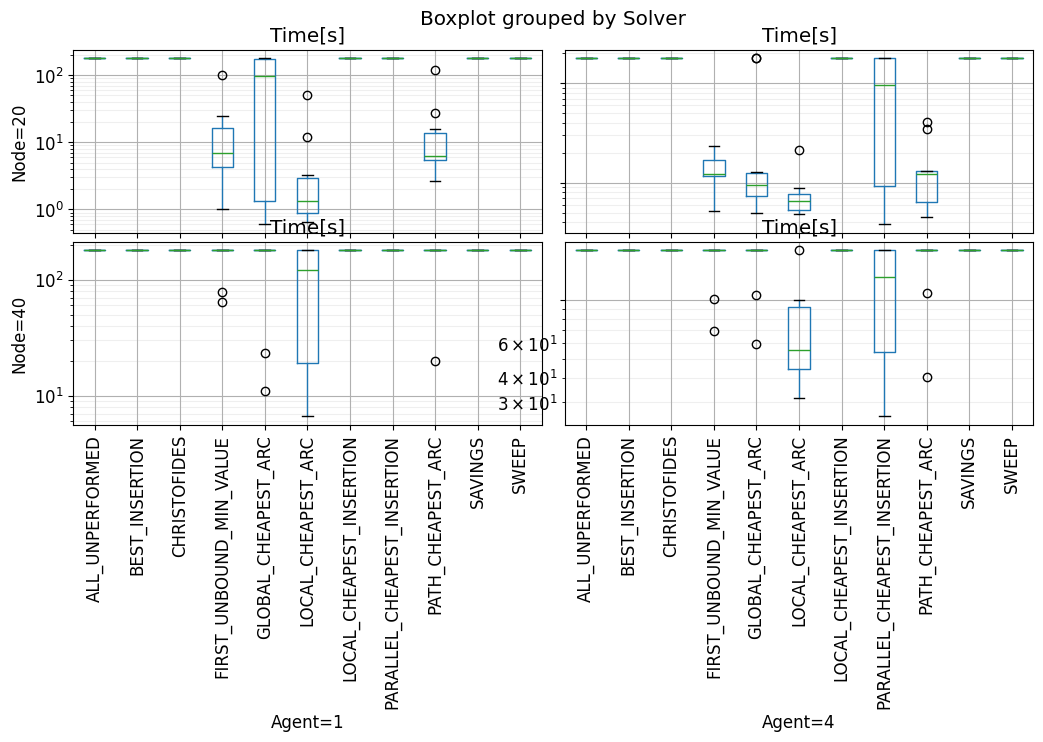

In [4]:
plt.rcParams.update({"font.size": 12})


# Get a list of arguments

Solvers = df["Solver"].unique()
print(Solvers)

Nodes = df["Node"].unique()
print(Nodes)

ConstraintRatio = df["ConstraintRatio"].unique()
print(ConstraintRatio)

MaxTimeGap = df["MaxTimeGap"].unique()
print(MaxTimeGap)

Agents = df["Agent"].unique()
print(Agents)

xLabel = "Node"
yLabel = "Agent"
xElems = Nodes
yElems = Agents

fig, axes = plt.subplots(nrows=len(xElems), ncols=len(yElems), figsize=(12, 5))

for irow, xelem in enumerate(xElems):
    for icol, yelem in enumerate(yElems):
        df.loc[(df[xLabel] == xelem) & (df[yLabel] == yelem)].boxplot(
            column=["Time[s]"],
            by=["Solver"],
            grid=True,
            rot=90,
            ax=axes[irow, icol],
        )
        # .plot(
        #     kind="box",
        #     # x="Solver",
        #     y="Time[s]",
        #     grid=True,
        #     # rot=0,
        #     ax=axes[irow, icol],
        #     ylim=(0, 180),
        #     legend=False,
        #     logy=True,
        #     # width=0.75,
        # )
        axes[irow, icol].set_yscale("log")

        axes[irow, icol].grid("on", which="minor", axis="x", alpha=0.2)
        axes[irow, icol].grid("on", which="minor", axis="y", alpha=0.2)

        if icol == 0:
            axis = axes[irow, icol].get_yaxis()
            axis.set_label_text(f"{xLabel}={xelem}")
        else:
            axis = axes[irow, icol].get_yaxis()
            axis.set_major_formatter(NullFormatter())
            axes[irow, icol].set(xlabel=None)

        if irow == len(xElems) - 1:
            axis = axes[irow, icol].get_xaxis()
            axis.set_label_text(f"{yLabel}={yelem}")
        else:
            axis = axes[irow, icol].get_xaxis()
            axis.set_major_formatter(NullFormatter())
            axes[irow, icol].set(xlabel=None)

plt.subplots_adjust(wspace=0.05, hspace=0.05)
# fig.tight_layout()
# plt.legend(
#     bbox_to_anchor=(0.3, 0.9),
#     loc="lower left",
#     bbox_transform=fig.transFigure,
#     # ncol=len(Agents),
# )
plt.savefig("benchmark_ortoolsovlers.png", dpi=300)